**Capítulo 8 - Redução da dimensionalidade**

## 1. Introdução à Redução de Dimensionalidade

A redução de dimensionalidade aborda o desafio de trabalhar com conjuntos de dados que possuem um número excessivo de *features* (características).

### 1.1. A Maldição da Dimensionalidade

*   **Problema**: Muitos problemas de Machine Learning (ML) envolvem milhares ou até milhões de *features* por instância de treinamento.
*   **Consequências**:
    *   Torna o treinamento **extremamente lento**.
    *   Dificulta a busca por uma boa solução.
    *   Em espaços de alta dimensionalidade, os dados são muito **esparsos**, fazendo com que as instâncias de treinamento fiquem distantes umas das outras.
    *   Isso torna as previsões **menos confiáveis** e aumenta o risco de *overfitting*.

### 1.2. Motivações para Redução de Dimensionalidade

Apesar de haver uma perda de informação, a redução de dimensionalidade é valiosa pelas seguintes razões:
*   **Acelerar algoritmos de treinamento**: Diminuir o número de *features* pode tornar o treinamento mais rápido e, em alguns casos, melhorar o desempenho ao remover ruído e *features* redundantes.
*   **Visualizar os dados**: Reduzir a dimensionalidade para 2 ou 3 dimensões permite a **visualização** do conjunto de treinamento, o que pode revelar padrões e *insights*, como *clusters*.
*   **Economizar espaço**: Atua como uma forma de **compressão de dados**, diminuindo o tamanho do conjunto de dados.

### 1.3. Desvantagens Principais

É crucial estar ciente das desvantagens da redução de dimensionalidade:
*   **Perda de informação**: Alguma informação é **inevitavelmente perdida**, o que pode degradar o desempenho do modelo subsequente.
*   **Reversão imperfeita**: É quase sempre **impossível reverter perfeitamente** a operação de redução de dimensionalidade, pois a informação perdida não pode ser recuperada.

## 2. Abordagens Principais

Existem duas abordagens principais para a redução de dimensionalidade.

### 2.1. Projeção (Projection)

*   **Premissa**: Assume que as instâncias de treinamento estão dentro (ou próximas a) um **subespaço de dimensão muito inferior**.
*   **Funcionamento**: Envolve projetar perpendicularmente cada instância de treinamento neste subespaço de menor dimensão, resultando em um novo conjunto de dados 2D.
*   **Limitação**: Esta abordagem **não é ideal** quando o subespaço se curva ou se torce, como no exemplo do "rolo suíço" (*Swiss roll*), pois isso **achata diferentes camadas** de dados.

### 2.2. Aprendizagem de Variedades (Manifold Learning)

*   **Foco**: Lida com conjuntos de dados que se assemelham a um **variedade de menor dimensão** (*d-dimensional manifold*) que está "dobrada e torcida" em um espaço de alta dimensão.
*   **Objetivo**: "Desenrolar" essa variedade para obter uma representação de baixa dimensão sem achatar camadas de dados.
*   **Hipótese da Variedade**: Sugere que as tarefas de ML serão mais simples no espaço de baixa dimensão da variedade.

## 3. Principais Técnicas de Redução de Dimensionalidade

O capítulo detalha as seguintes técnicas.

### 3.1. Análise de Componentes Principais (PCA - Principal Component Analysis)

É o algoritmo de redução de dimensionalidade **mais popular**.

*   **Funcionamento**:
    *   Identifica o **hiperplano que está mais próximo dos dados** e projeta os dados sobre ele.
    *   Busca o eixo (o primeiro **Componente Principal - PC**) que **preserva a quantidade máxima de variância** nos dados. Isso também minimiza a distância quadrática média entre o conjunto de dados original e sua projeção.
    *   Os PCs são encontrados usando **Decomposição de Valores Singulares (SVD)**.
*   **Com `Scikit-Learn`**: A classe `PCA` pode ser usada, e ela centraliza os dados automaticamente.
*   **Razão de Variância Explicada (`explained_variance_ratio_`)**: Indica a proporção da variância dos dados ao longo de cada eixo principal, ajudando a escolher o número certo de dimensões (ex: 95% da variância).
*   **Compressão de dados**: Útil para reduzir o tamanho do conjunto de dados enquanto preserva a maior parte da variância (ex: MNIST para 150 *features* de 784, preservando 95% da variância).
*   **Descompressão**: Permite a reconstrução do conjunto de dados reduzido de volta às dimensões originais usando a transformação inversa (`inverse_transform()`).
    *   No entanto, há uma **perda de informação** (erro de reconstrução) devido à variância descartada.
*   **Tipos de PCA**:
    *   **PCA Incremental (Incremental PCA - IPCA)**: Utilizado para **grandes conjuntos de dados que não cabem na memória**. Ele divide o conjunto de treinamento em mini-batches e os alimenta sequencialmente.
    *   **PCA Randomizado (Randomized PCA)**: Um algoritmo estocástico mais rápido que encontra uma aproximação dos primeiros *d* componentes principais. É significativamente mais rápido que os algoritmos anteriores quando *d* (número de dimensões desejado) é muito menor que *n* (número original de *features*).

### 3.2. PCA de Kernel (Kernel PCA - kPCA)

*   **Técnica**: Aplica o "**truque do kernel**" (*kernel trick*) para realizar redução de dimensionalidade **não linear**.
*   **Funcionamento**: Mapeia implicitamente as instâncias para um espaço de *features* de alta dimensão e executa o PCA linear nesse novo espaço. Uma fronteira de decisão linear no espaço de alta dimensão corresponde a uma fronteira não linear complexa no espaço original.
*   **Aplicações**: Permite aprender limites de decisão complexos.
*   **Seleção de Kernel e Hiperparâmetros**: A escolha do kernel (ex: RBF Gaussiano) e o ajuste dos hiperparâmetros são cruciais. Pode ser feito minimizando o **erro de pré-imagem de reconstrução**.
    *   Com `Scikit-Learn`, a classe `KernelPCA` pode ser usada.

### 3.3. Embutimento Linear Localmente (LLE - Locally Linear Embedding)

*   **Tipo**: É uma técnica de **Manifold Learning** que não depende de projeções.
*   **Funcionamento**: Mede como cada instância se relaciona linearmente com seus vizinhos mais próximos e busca uma representação de baixa dimensão que preserve essas relações locais.
*   **Eficácia**: Muito eficaz para "desenrolar" variedades distorcidas com pouco ruído.
    *   Com `Scikit-Learn`, a classe `LocallyLinearEmbedding` pode ser usada.

## 4. Outras Técnicas Mencionadas

O capítulo também menciona brevemente outras técnicas:
*   **Escalonamento Multidimensional (MDS - Multidimensional Scaling)**: Tenta preservar as distâncias entre as instâncias.
*   **Isomap**: Cria um gráfico conectando instâncias aos seus vizinhos e preserva as distâncias geodésicas.
*   **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: Frequentemente usada para visualização e agrupamento de dados complexos e não rotulados, produzindo representações 2D ou 3D que mostram a organização dos dados.

---

### **Implementação**

In [49]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt
import time

In [5]:
X = np.array([[1, 2], [3, 4], [5, 6]])
x = X  

X_centered = X - x.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)

c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [7]:
w2 = Vt.T[:, 1]
X2D = X_centered.dot(w2)

In [9]:
pca = PCA(n_components=2)
X2D_sklearn = pca.fit_transform(X)

In [10]:
pca.explained_variance_ratio_

array([1., 0.])

In [12]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [14]:
X_train = X
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [16]:
pca = PCA(n_components=2)  
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

**PCA incremental**

In [31]:
min_samples_per_batch = inc_pca.n_components
n_batches = max(1, len(X_train) // min_samples_per_batch)

inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

if hasattr(inc_pca, 'components_'):
    X_reduced = inc_pca.transform(X_train)


In [28]:
filename = 'data_file.dat'  
m, n = 1000, 300  

if not os.path.exists(filename):
	X_data = np.random.rand(m, n).astype('float32')
	with open(filename, 'wb') as f:
		X_data.tofile(f)

X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=1000, n_components=154)

**PCA Randomizado**

In [29]:
rnd_pca = PCA(n_components=2, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_mm)

**Kernel PCA**

In [36]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)
y = np.array([0, 1, 0]) 

In [38]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": [0.03, 0.05, 10],
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=2)
grid_search.fit(X, y)

c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
7 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': [0.03, 0.05, 10],
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [39]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


In [40]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(x_reduced)

In [42]:
mean_squared_error(X, X_preimage)

3.172412676761227

**LLE** - Local Linear Embedding

In [45]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=2)
X_reduced = lle.fit_transform(X)

### **Exercícios**

1. Quais são as principais motivações para reduzir a dimensionalidade de um conjunto de dados? Quais são as principais desvantagens?

A. **Quais são as principais motivações para reduzir a dimensionalidade de um conjunto de dados?**

    - **Acelerar algoritmos de treinamento**: Reduzir o número de *features* pode tornar o treinamento mais rápido e, em alguns casos, melhorar o desempenho ao remover ruído e redundâncias.
    - **Visualização dos dados**: Reduzir a dimensionalidade para 2 ou 3 dimensões permite a visualização do conjunto de dados, revelando padrões e *insights* como *clusters*.
    - **Economizar espaço**: Atua como uma forma de compressão de dados, diminuindo o tamanho do conjunto de dados.
    - **Reduzir o risco de *overfitting***: Ao eliminar *features* irrelevantes ou redundantes, reduz-se a complexidade do modelo.
B. **Quais são as principais desvantagens?**

    - **Perda de informação**: A redução de dimensionalidade inevitavelmente descarta parte da informação, o que pode degradar o desempenho do modelo.
    - **Reversão imperfeita**: É quase sempre impossível reverter perfeitamente a operação de redução de dimensionalidade, pois a informação perdida não pode ser recuperada.
    - **Complexidade adicional**: A escolha da técnica e dos parâmetros corretos pode ser desafiadora e requer validação cuidadosa.

2. O quer é a maldição da dimensionalidade?

A maldição da dimensionalidade refere-se aos desafios e problemas que surgem ao lidar com dados em espaços de alta dimensionalidade. À medida que o número de dimensões aumenta:

- **Sparsidade dos dados**: Os dados tornam-se extremamente esparsos, dificultando a identificação de padrões significativos.
- **Distâncias menos informativas**: Em espaços de alta dimensão, as distâncias entre os pontos tornam-se menos discriminativas, o que pode prejudicar algoritmos baseados em proximidade, como KNN.
- **Aumento da complexidade computacional**: O custo computacional cresce exponencialmente com o número de dimensões.
- **Risco de overfitting**: Modelos treinados em dados de alta dimensionalidade podem ajustar-se ao ruído, em vez de capturar padrões reais.

Esses fatores tornam o treinamento de modelos de Machine Learning mais difícil e menos confiável em espaços de alta dimensionalidade.


3. Uma vez reduzida a dimensionalidade de um conjunto de dados, é possível reverter a operação? Em caso afirmativo, como? Se não, por quê?

Sim, é possível reverter a operação de redução de dimensionalidade, mas com limitações. A reversão é feita utilizando a transformação inversa fornecida por alguns algoritmos de redução de dimensionalidade, como o PCA. Por exemplo, no PCA, a função `inverse_transform()` pode ser usada para projetar os dados reduzidos de volta ao espaço original.

No entanto, a reversão não é perfeita, pois parte da informação é perdida durante a redução de dimensionalidade. Essa perda ocorre porque apenas as componentes principais mais importantes (com maior variância) são mantidas, enquanto as componentes menos significativas são descartadas. Isso resulta em um erro de reconstrução, ou seja, os dados recuperados não são idênticos aos dados originais.

4. O PCA pode ser utilizado para reduzir a dimensionalidade de um conjunto de dados altamente não linear?

O PCA tradicional não é ideal para reduzir a dimensionalidade de conjuntos de dados altamente não lineares. Isso ocorre porque o PCA é uma técnica linear que projeta os dados em um subespaço linear de menor dimensão, preservando a maior parte da variância. Em dados não lineares, as relações complexas entre as variáveis podem não ser capturadas adequadamente por uma projeção linear, resultando em perda significativa de informação.

Para lidar com dados não lineares, uma alternativa é o Kernel PCA (kPCA), que utiliza o "truque do kernel" para mapear os dados para um espaço de alta dimensão onde uma separação linear (ou redução linear) pode ser aplicada. Isso permite capturar as estruturas não lineares dos dados de forma mais eficaz.

5. Suponha que você execute um PCA em um conjunto de dados de mil dimensões, definindo a taxa de variância explicada em 95%. Quantas dimensões o conjunto de dados resultante terá?

Se você executar um PCA em um conjunto de dados de mil dimensões, definindo a taxa de variância explicada em 95%, o número de dimensões resultante dependerá da proporção de variância explicada por cada componente principal. O PCA selecionará automaticamente o menor número de dimensões que, em conjunto, explicam pelo menos 95% da variância.

Para determinar o número exato de dimensões, você pode usar o atributo `explained_variance_ratio_` do objeto PCA e calcular o cumsum (soma cumulativa) para encontrar o ponto onde a soma atinge 95%. No código fornecido, isso é feito com:

```python
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
```

O valor de `d` será o número de dimensões resultante. Sem os dados exatos, não é possível determinar o valor de `d` diretamente, mas o PCA ajustará automaticamente para atingir a taxa de variância explicada especificada.


6. Em que casos você usaria o PCA normal, PCA incremental, PCA randomizado ou Kernel PCA?

- **PCA normal**: Use quando o conjunto de dados é pequeno o suficiente para caber na memória e você deseja realizar uma redução de dimensionalidade linear. É a escolha padrão para a maioria dos casos.

- **PCA incremental**: Use quando o conjunto de dados é muito grande para caber na memória. Ele processa os dados em mini-lotes, permitindo a redução de dimensionalidade em conjuntos de dados massivos.

- **PCA randomizado**: Use quando você precisa de uma solução aproximada muito mais rápida para conjuntos de dados grandes, especialmente quando o número de dimensões desejado (*d*) é muito menor que o número original de *features* (*n*).

- **Kernel PCA**: Use quando os dados possuem relações não lineares e você deseja capturar essas estruturas complexas. Ele é útil para tarefas como separação de classes não linear e redução de dimensionalidade para dados não lineares.

7. Como você pode avaliar o desempenho de um algoritmo de redução da dimensionalidade em seu conjunto de dados?

Para avaliar o desempenho de um algoritmo de redução de dimensionalidade, você pode analisar a variância explicada (quanto da informação original foi preservada), medir o erro de reconstrução, comparar o desempenho de modelos de machine learning treinados com os dados reduzidos, visualizar os dados em 2D ou 3D para verificar se padrões importantes foram mantidos e, em técnicas de manifold learning, checar se a estrutura local e global dos dados foi preservada.

8. Faz algum sentido juntar dois algoritmos diferentes de redução da dimensionalidade?

Sim, faz sentido combinar dois algoritmos diferentes de redução de dimensionalidade em algumas situações. Por exemplo, você pode usar um método linear como o PCA para remover ruído e reduzir a dimensionalidade inicial dos dados, e em seguida aplicar um método não linear, como t-SNE ou LLE, para capturar estruturas mais complexas em um espaço ainda menor. Essa abordagem pode melhorar a eficiência computacional e a qualidade da representação final, especialmente em conjuntos de dados muito grandes ou com muitas dimensões. No entanto, é importante validar se a combinação realmente traz benefícios para o seu caso, pois em alguns cenários pode não haver ganho significativo.

9. Carregue o conjunto de dados MNIST e o divida em um conjunto de treinamento e um conjunto de teste (pegue as primeiras 60 mil instâncias para treinamento e os 10 mil restantes para teste). Treine um classificador Floresta Aleatória no conjunto de dados, cronometre quanto tempoo ele demora, e avalie o modelo resultante no conjunto de teste. Em seguida, utilize o PCA para reduzir a dimensionalidade no conjunto de dados com taxa de variância explicada de 95%. Treine um novo classificador Floresta Aleatória no conjunto de dados reduzido e veja quanto tempo demorou. O treinamento foi muito mais rápido? Em seguida, avalie o classificador no conjunto de testes: como ele se compara ao classificador anteior?

In [48]:
digits = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = digits['data'], digits['target']
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Random Forest sem redução
t0 = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
t1 = time.time()
y_pred = rf.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)
print(f"Tempo sem PCA: {t1-t0:.2f}s, Acurácia: {acc_original:.4f}")

# PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Random Forest com redução
t0 = time.time()
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)
t1 = time.time()
y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Tempo com PCA: {t1-t0:.2f}s, Acurácia: {acc_pca:.4f}")

Tempo sem PCA: 31.38s, Acurácia: 0.9705
Tempo com PCA: 89.18s, Acurácia: 0.9488
Tempo com PCA: 89.18s, Acurácia: 0.9488


10. Utilize o t-SNE para reduzir o conjunto de dados MNIST para duas dimensões e plotar o resultado com a utilização do matplotlib. Você pode utilizar um gráfico de dispersão com dez cores diferentes para representar a classe de destino de cada imagem. Alternativamente, escreva dígitos coloridos no local de cada instância ou até mesmo plote versões reduzidas das próprias imagens dos dígitos (se plotar todos os dígitos sua visualização será muito confusa, então desenhe uma amostra aleatória ou plote uma instância apenas se nenhuma outra já tiver sido plotada a uma distância próxima). Você deve obter uma boa visualização com grupos de dígitos bem separados. Tente uutilizar outros algoritmos de redução da dimensionalidade como PCA, LLE ou MDS e compare as visualizações resultantes.

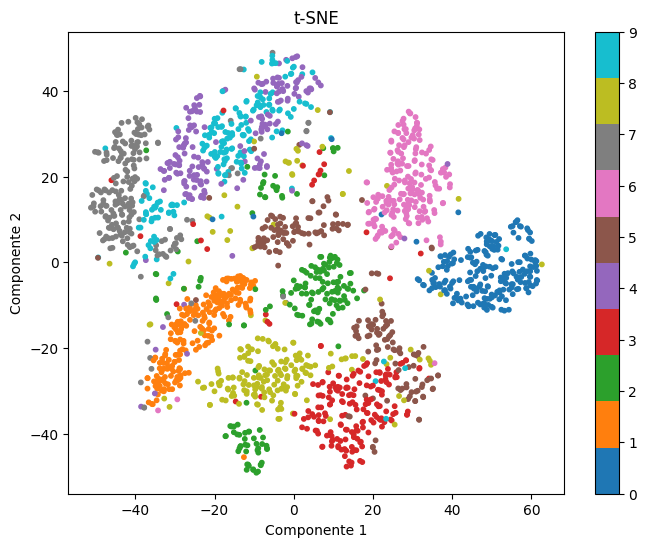

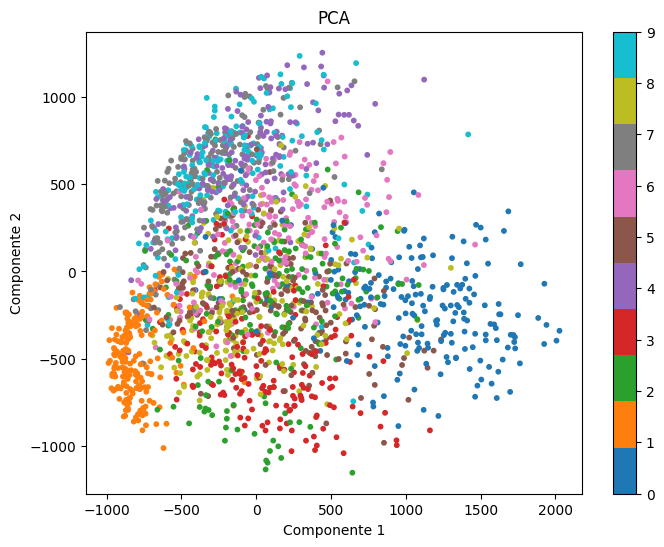

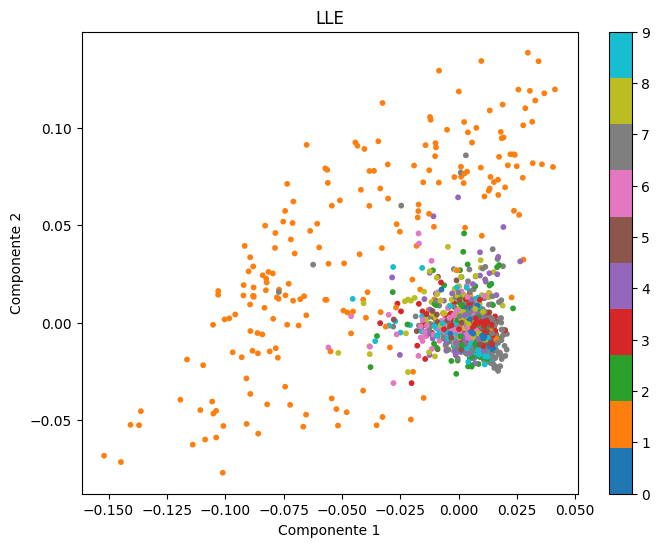

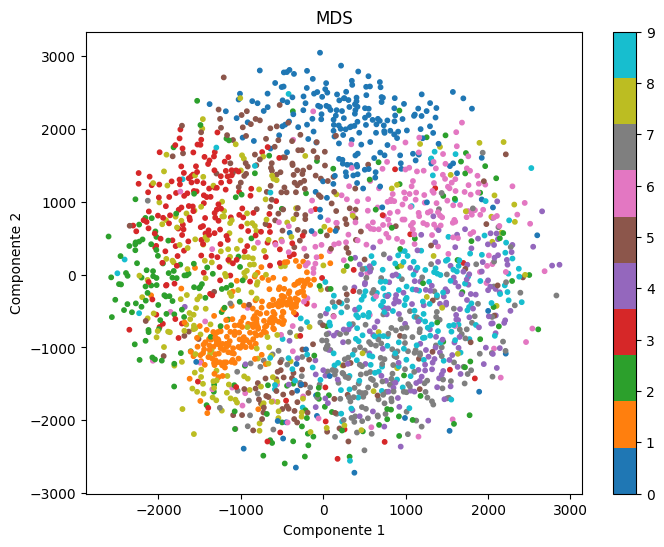

In [51]:
# Amostra dos dados para acelerar o processamento
sample_size = 2000
indices = np.random.choice(len(X_train), sample_size, replace=False)
X_sample = X_train[indices]
y_sample = y_train[indices]

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)

# LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30)
X_lle = lle.fit_transform(X_sample)

# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_sample)

def plot_embedding(X, title, y):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.astype(int), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()

plot_embedding(X_tsne, "t-SNE", y_sample)
plot_embedding(X_pca, "PCA", y_sample)
plot_embedding(X_lle, "LLE", y_sample)
plot_embedding(X_mds, "MDS", y_sample)